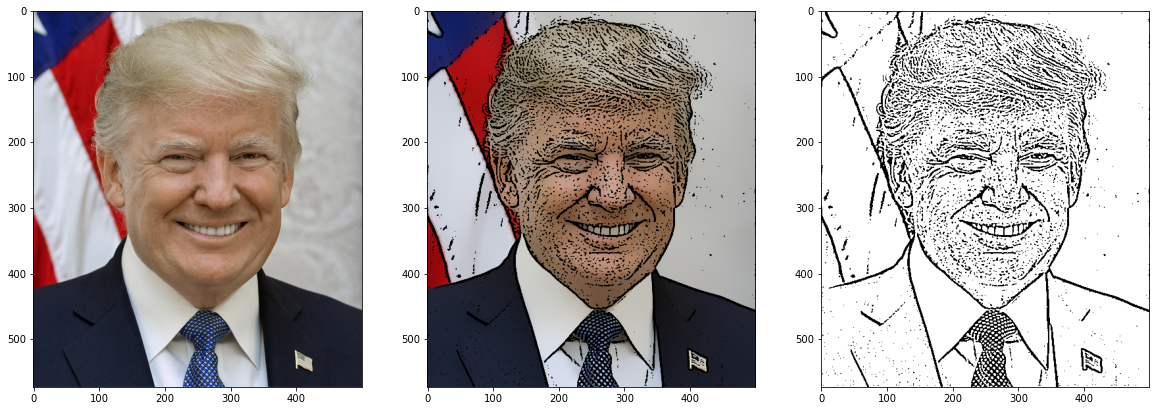

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def cartoonify(image, arguments=0):
    
    #convert to gray scale
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply gaussian blur
    grayImage = cv2.GaussianBlur(grayImage, (3, 3), 0)

    #detect edges
    edgeImage = cv2.Laplacian(grayImage, -1, ksize=5)
    edgeImage = 255 - edgeImage

    #threshold image
    ret, edgeImage = cv2.threshold(edgeImage, 150, 255, cv2.THRESH_BINARY)

    #blur images heavily using edgePreservingFilter
    edgePreservingImage = cv2.edgePreservingFilter(image, flags=2, sigma_s=50, sigma_r=0.4)

    #create output matrix
    output =np.zeros(grayImage.shape)

    #combine cartoon image and edges image
    cartoonImage = cv2.bitwise_and(edgePreservingImage, edgePreservingImage, mask=edgeImage)

    return cartoonImage

def pencilSketch(image, arguments=0):
    
    #convert to gray scale
    output = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Apply gaussian blur
    output = cv2.GaussianBlur(output, (3,3), 0)

    #detect edges in the image
    output = cv2.Laplacian(output, -1, ksize=5)

    #invert the binary image
    output = 255 - output

    #binary thresholding
    ret, pencilSketchImage = cv2.threshold(output, 150, 255, cv2.THRESH_BINARY)
    
    return pencilSketchImage

imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage,cmap='gray');

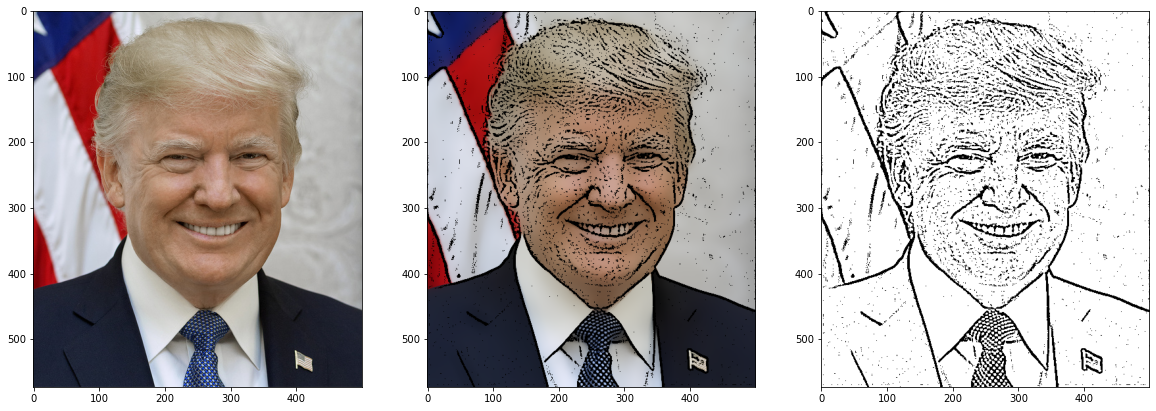

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'


def cartoonify(image, arguments=0):
    ### YOUR CODE HERE
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(img_gray, 3)
    edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    color = cv2.bilateralFilter(image, 30, 80, 80)
    contours = pencilSketch(image)
    return cv2.bitwise_and(color, color, mask = contours[:,:,0])


def pencilSketch(image, arguments=0):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(img_gray, (5,5), 1.5)
    lapl = cv2.Laplacian(blurred, cv2.CV_8U, ksize=3, scale=2, delta = 1)
    _, dst = cv2.threshold(lapl, 16, 255, cv2.THRESH_BINARY)
                    
    return cv2.cvtColor(255-dst, cv2.COLOR_GRAY2BGR)


imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

#targetImg = cv2.imread("data/images/cartoon.jpg")
#cv2.imshow('targetImg',targetImg)

plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage[:,:,::-1]);
plt.show()